**Identification of splitting variable and value**

Top down and greedy approach

Binary recursive splitting

By minimizing residual sum of squares (Res_SS)

**Example (X is continuous + categorical)**

Develop a tree based model for predicting defect density using Author_Skill and Review_Type. The data is given in Defect_Density.xlsx

In [2]:
#Import the packages
import pandas as pd
import math 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [3]:
#Import the dataset
data = pd.read_excel('Defect_Density.xlsx')

In [5]:
#Check the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Author_Skill    23 non-null     object
 1   Review_Type     23 non-null     object
 2   Defect_Density  23 non-null     object
dtypes: object(3)
memory usage: 680.0+ bytes


In [6]:
#Explore the dataset
data.head()

,Author_Skill,Review_Type,Defect_Density
0,Fresher,Peer,High
1,Fresher,Peer,High
2,Fresher,Peer,High
3,Fresher,Peer,High
4,Fresher,Peer,High


So, we find that all the variables are categorical variables.

**We convert the object type to categorical type**

In [8]:
#Factorize the categorical variables
data.Author_Skill = pd.Categorical(data.Author_Skill)
data.Review_Type = pd.Categorical(data.Review_Type)
data.Defect_Density = pd.Categorical(data.Defect_Density)

In [9]:
#Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Author_Skill    23 non-null     category
 1   Review_Type     23 non-null     category
 2   Defect_Density  23 non-null     category
dtypes: category(3)
memory usage: 585.0 bytes


In [10]:
# Separate x's 
x = data.iloc[:,[0,1]]
#Check x
x.head()

,Author_Skill,Review_Type
0,Fresher,Peer
1,Fresher,Peer
2,Fresher,Peer
3,Fresher,Peer
4,Fresher,Peer


In [11]:
#Separate y
y = data.Defect_Density
#Check Response Variable
y.head()

0    High
1    High
2    High
3    High
4    High
Name: Defect_Density, dtype: category
Categories (3, object): ['High', 'Low', 'Medium']

As the dataset has only 23 observations, we don't do Train-Test split. We build the model on the whole dataset.

In [12]:
#Specify the CART model
model = tree.DecisionTreeClassifier()

We can't fit the model if x has categorical features.

In [13]:
#Fit the model
model = model.fit(X=x,y=y)

ValueError: could not convert string to float: 'Fresher'

So, we have to get dummies for categorical data.

In [15]:
x = pd.get_dummies(data=x,drop_first=True)
#Convert categorical variable into dummy/indicator variables.
'''
drop_first : bool, default False
    Whether to get k-1 dummies out of k categorical levels by removing the
    first level.
'''

'\ndrop_first : bool, default False\n    Whether to get k-1 dummies out of k categorical levels by removing the\n    first level.\n'

In [16]:
#Fit the model
model = model.fit(X=x,y=y)

In [17]:
#Model accuarcy
rsq = model.score(X=x,y=y)
rsq

0.9130434782608695

**Hyper parameter tuning**

In [18]:
#Hyper parameter tuning
paramgrid = {'min_samples_split':[4,6,8,10]}

In [19]:
#Set up the search
search = GridSearchCV(estimator=model,param_grid=paramgrid,scoring='accuracy',cv=4,verbose= True)

In [20]:
#Fit the search to the data
search = search.fit(X=x,y=y)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [21]:
#Best parameters
search.best_params_

{'min_samples_split': 4}

We can specify the number of leaf nodes, i.e, the number of total classes of data.

In [22]:
#Specify the optimum tree model
model = tree.DecisionTreeClassifier(min_samples_split=4)

In [23]:
#Fit the model to the data
model.fit(X=x,y=y)

DecisionTreeClassifier(min_samples_split=4)

In [24]:
#Model accuracy 
rsq = model.score(x,y)
rsq

0.9130434782608695

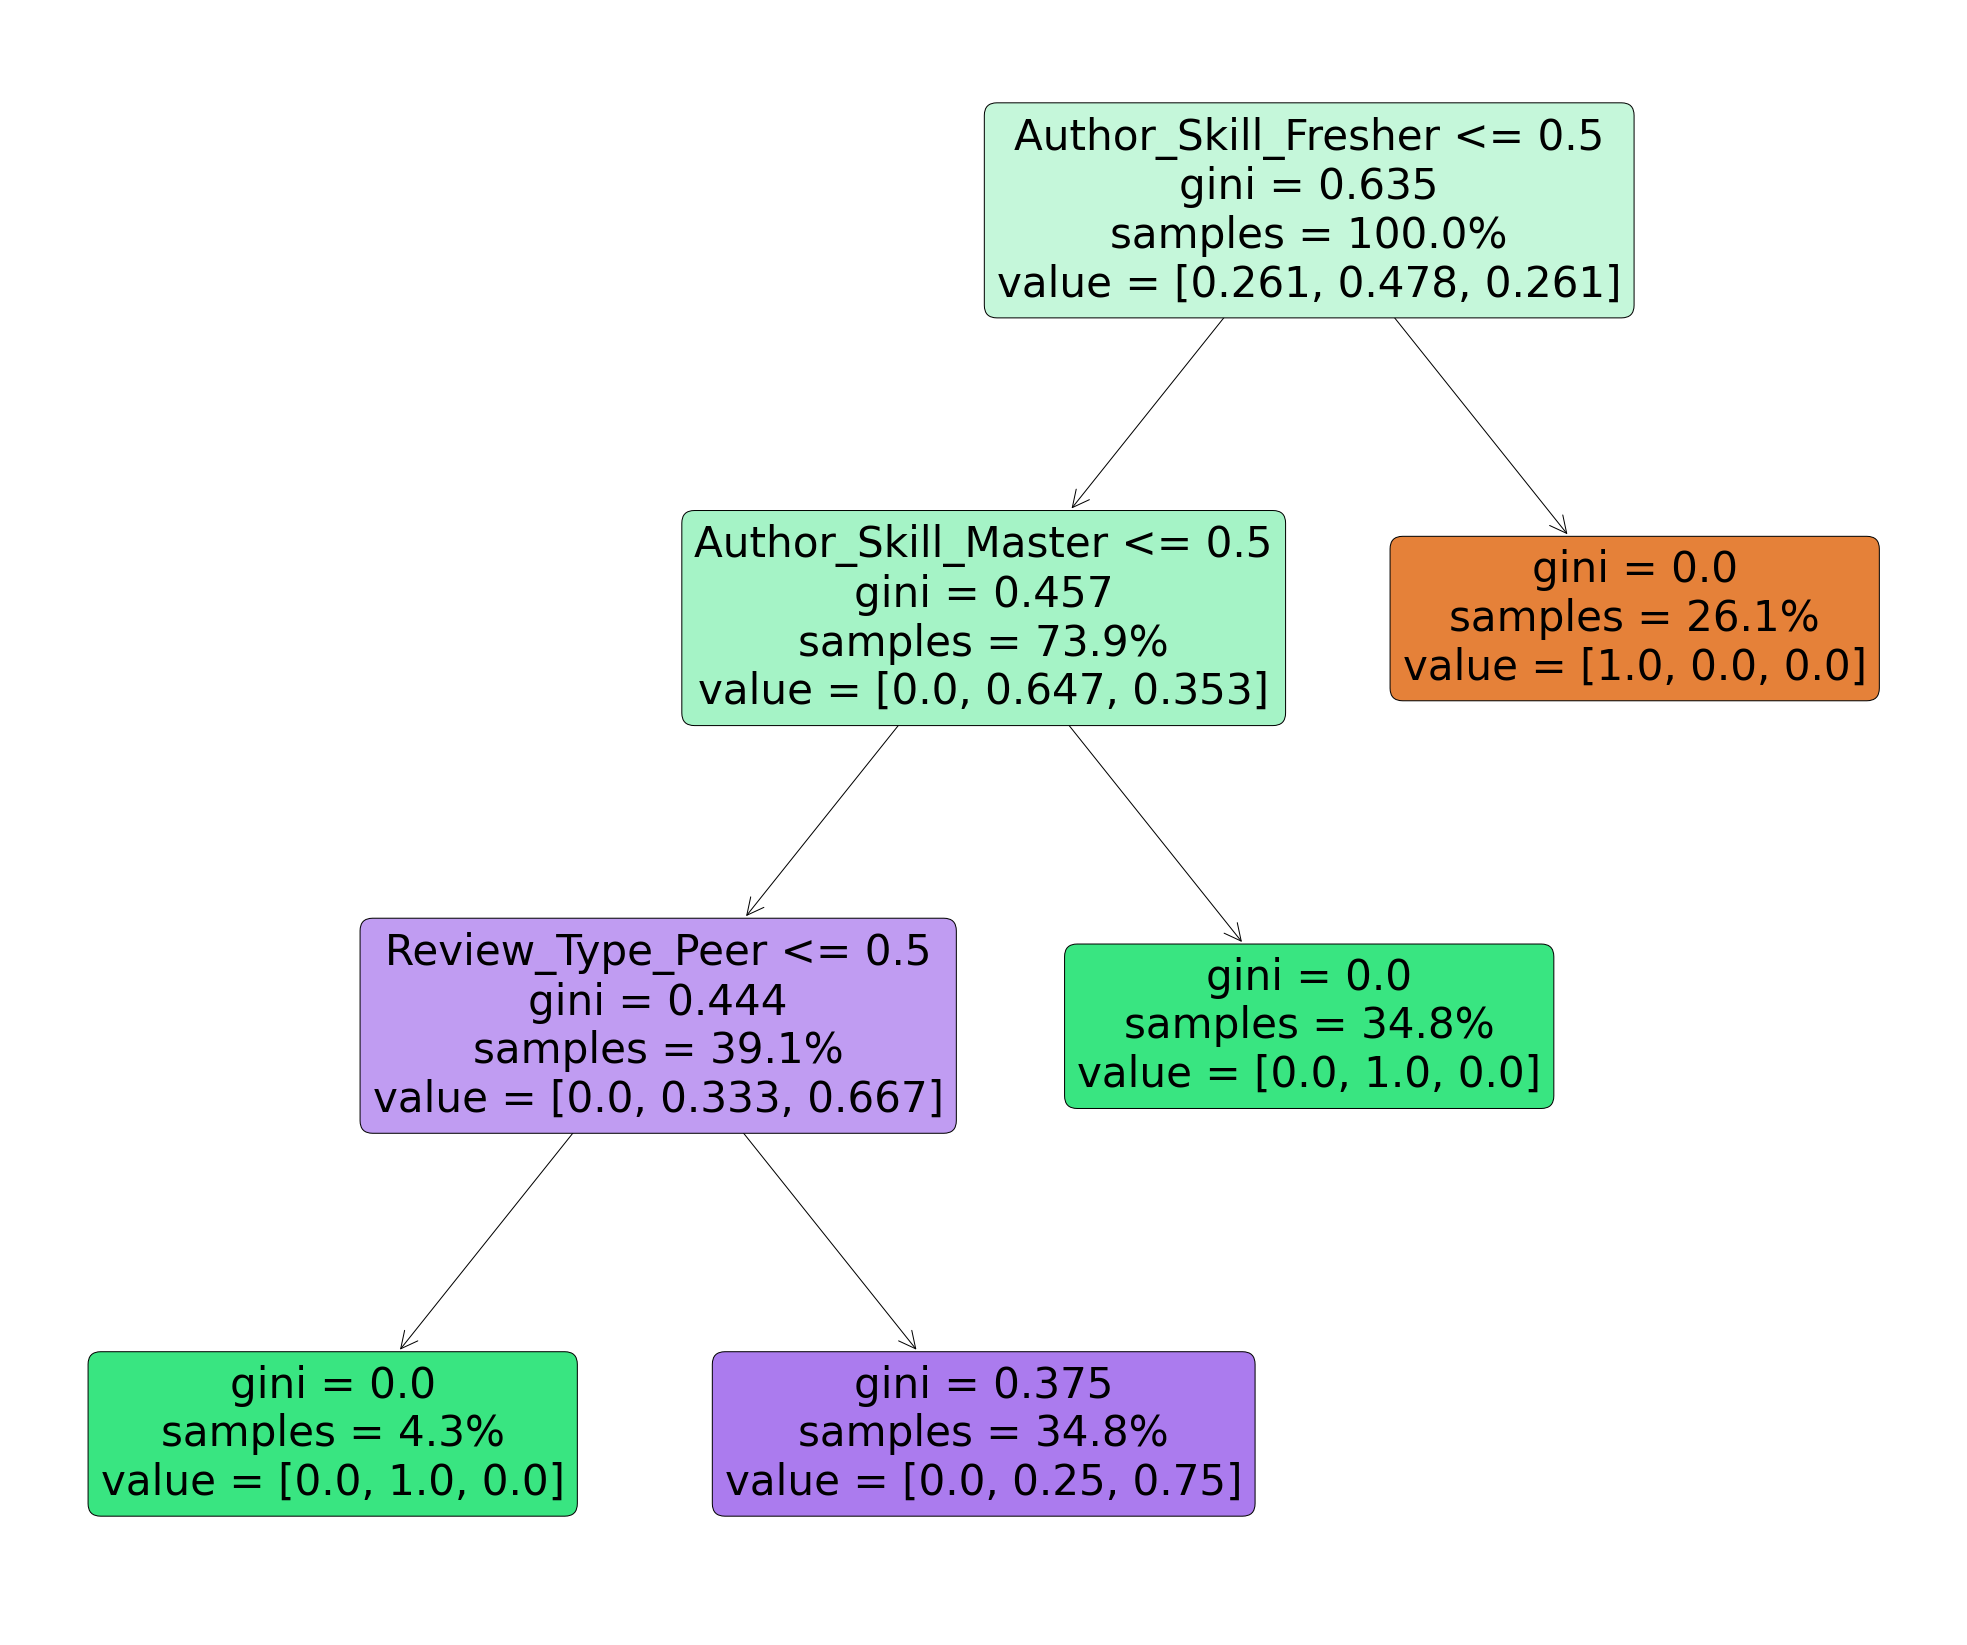

In [26]:
#Plot tree
plt.figure(figsize=(35,30))
tree.plot_tree(decision_tree=model,feature_names=x.columns,filled=True,proportion=True,rounded=True)
plt.show()